In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
# TODO: Remove

In [2]:
# TODO: Change back to original and fix reading if it hasn't been updated online
df = pd.read_csv("project_data_changed.csv", sep=";")

# Exploratory Data Analysis

In [3]:
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
X01    1000 non-null object
X02    1000 non-null int64
X03    1000 non-null object
X04    1000 non-null object
X05    1000 non-null int64
X06    1000 non-null object
X07    1000 non-null object
X08    1000 non-null int64
X09    1000 non-null object
X10    1000 non-null object
X11    1000 non-null int64
X12    1000 non-null object
X13    1000 non-null int64
X14    1000 non-null object
X15    1000 non-null object
X16    1000 non-null int64
X17    1000 non-null object
X18    1000 non-null int64
X19    1000 non-null object
X20    1000 non-null object
Y      1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


#### Numerical data distribution

In [5]:
df_num = df.select_dtypes(include = ['int64'])
df_num.head()

,X02,X05,X08,X11,X13,X16,X18,Y
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


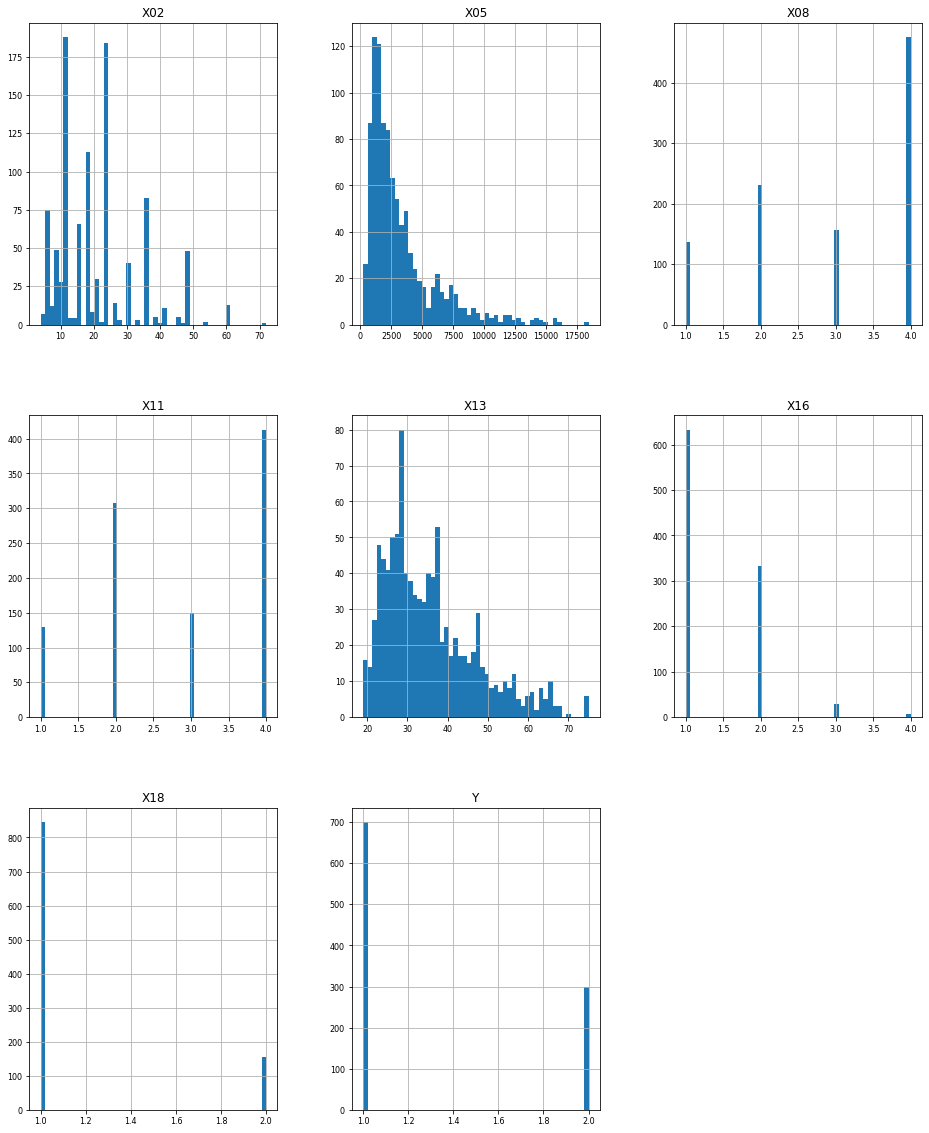

In [6]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

X05 and X13 seems to share a similar distribution

#### Correlation

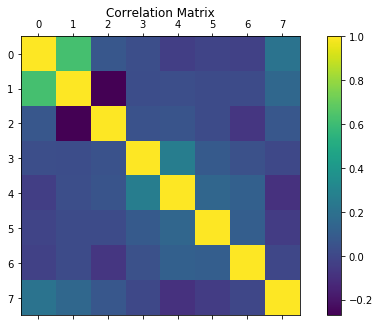

In [7]:
f = plt.figure(figsize=(10, 5))
plt.matshow(df_num.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix');

In [8]:
df_num_corr = df_num.corr()['Y']
features_list = df_num_corr.sort_values(ascending=False)
print("Correlated values with Y:\n{}".format(features_list))

Correlated values with Y:
Y      1.000000
X02    0.214927
X05    0.154739
X08    0.072404
X11    0.002967
X18   -0.003015
X16   -0.045732
X13   -0.091127
Name: Y, dtype: float64


In [9]:
from sklearn import preprocessing

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
df

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Normalize

In [12]:
df_num.columns

Index(['X02', 'X05', 'X08', 'X11', 'X13', 'X16', 'X18', 'Y'], dtype='object')

In [13]:
num_cols = df_num.columns[:-1]
num_cols

Index(['X02', 'X05', 'X08', 'X11', 'X13', 'X16', 'X18'], dtype='object')

In [14]:
df_normalized = df.copy()
df_normalized[num_cols] = df_normalized[num_cols].apply(preprocessing.scale)

## Encode objects

In [15]:
df_obj_column_names = df.select_dtypes(include = ['O']).columns
df_obj_column_names

Index(['X01', 'X03', 'X04', 'X06', 'X07', 'X09', 'X10', 'X12', 'X14', 'X15',
       'X17', 'X19', 'X20'],
      dtype='object')

In [16]:
df_encoded = df_normalized.copy()
df_encoded[df_obj_column_names] = df_encoded[df_obj_column_names].apply(preprocessing.LabelEncoder().fit_transform)

In [17]:
df_encoded.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0,-1.236478,4,4,-0.745131,4,4,0.918477,2,0,...,0,2.766456,2,1,1.027079,2,-0.428290,1,0,1
1,1,2.248194,2,4,0.949817,0,2,-0.870183,1,0,...,0,-1.191404,2,1,-0.704926,2,-0.428290,0,0,2
2,3,-0.738668,4,7,-0.416562,0,3,-0.870183,2,0,...,0,1.183312,2,1,-0.704926,1,2.334869,0,0,1
3,0,1.750384,2,3,1.634247,0,3,-0.870183,2,2,...,1,0.831502,2,2,-0.704926,2,2.334869,0,0,1
4,0,0.256953,3,0,0.566664,0,2,0.024147,2,0,...,3,1.535122,2,2,1.027079,2,2.334869,0,0,2


# Classification

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_encoded.drop('Y',axis=1)
y = df_encoded['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

In [20]:
from sklearn.svm import SVC
model = SVC(probability=True, random_state=0)
model.fit(X_train,y_train)

SVC(probability=True, random_state=0)

In [21]:
model.score(X_test, y_test)

0.7318181818181818

# Cross-validation

In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [23]:
cvr = cross_val_score(model, X, y, cv=10)
cvr.mean(), cvr.std()

(0.758, 0.03515679166249389)

# Prediction

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
def report(gt, pred):
    print(confusion_matrix(gt, pred))
    print(classification_report(gt, pred))
    print("Accuracy score: ", accuracy_score(gt, pred)) 

In [27]:
report(y_test, pred)

[[132  23]
 [ 36  29]]
              precision    recall  f1-score   support

           1       0.79      0.85      0.82       155
           2       0.56      0.45      0.50        65

    accuracy                           0.73       220
   macro avg       0.67      0.65      0.66       220
weighted avg       0.72      0.73      0.72       220

Accuracy score:  0.7318181818181818


### We want the bad customer class (2) recall to be close to 100%, because it is far worse if a bad customer is classified as good, as opposed to a good customer being classified as bad

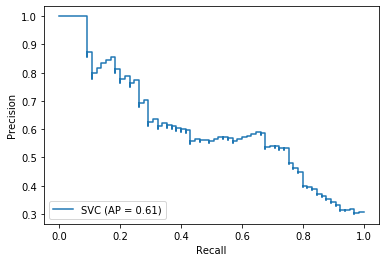

In [28]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X_test, y_test);

# Grid search
We are going to optimize for recall with grid search

In [29]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
def plot_compare(new_model, original=model):
    _, ax = plt.subplots(1,2, figsize=(15,5))    
    plot_precision_recall_curve(original, X_test, y_test, name="Original", ax=ax[0]);
    ax[0].set_title("Original")
    plot_precision_recall_curve(new_model, X_test, y_test, name="New", ax=ax[1]);
    ax[1].set_title("New")

def conf_matrix(m): 
    pred = m.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [30]:
param_grid = {'C': [0.001,0.01, 0.1, 0.5, 1, 10, 100], 'gamma': ['auto', 'scale']}

In [31]:
from sklearn.metrics import recall_score, make_scorer
custom_scorer = make_scorer(recall_score,  pos_label=2)
n_model = SVC(probability=True, random_state=0)
grid_search = GridSearchCV(n_model, param_grid, n_jobs=-1, verbose = 1, scoring=custom_scorer)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.3s finished


GridSearchCV(estimator=SVC(probability=True, random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': ['auto', 'scale']},
             scoring=make_scorer(recall_score, pos_label=2), verbose=1)

In [32]:
best_search_model = grid_search.best_estimator_
best_search_model.score(X_test, y_test)

0.7272727272727273

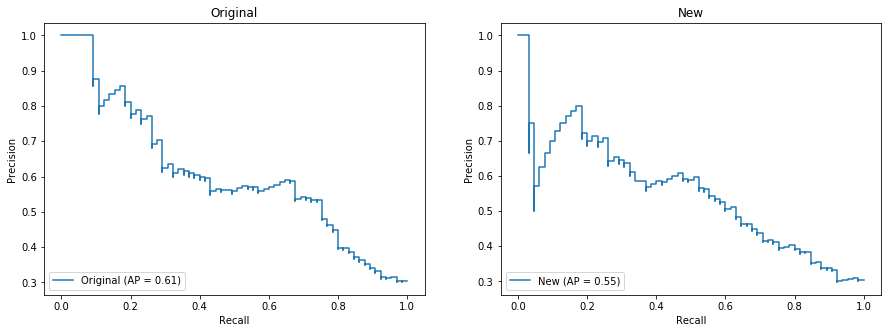

In [33]:
plot_compare(best_search_model, model)

In [34]:
report(y_test, model.predict(X_test))

[[132  23]
 [ 36  29]]
              precision    recall  f1-score   support

           1       0.79      0.85      0.82       155
           2       0.56      0.45      0.50        65

    accuracy                           0.73       220
   macro avg       0.67      0.65      0.66       220
weighted avg       0.72      0.73      0.72       220

Accuracy score:  0.7318181818181818


In [35]:
report(y_test, best_search_model.predict(X_test))

[[124  31]
 [ 29  36]]
              precision    recall  f1-score   support

           1       0.81      0.80      0.81       155
           2       0.54      0.55      0.55        65

    accuracy                           0.73       220
   macro avg       0.67      0.68      0.68       220
weighted avg       0.73      0.73      0.73       220

Accuracy score:  0.7272727272727273


#### We can go even further by manually setting a threshold

In [36]:
# https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# TODO: refs
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
def adjus_classes(y_prob, t):
    return [1 if y >= t else 2 for y in y_prob]

#### Because it is five times worse to classify customers as good when they are bad than it is to classify customers bad when they are good we will set the threshold higher (to 0.8) for the good customer class 

In [37]:
y_scores = model.predict_proba(X_test)[:, 0]
pred_adjusted = adjus_classes(y_scores, 0.8)
report(y_test, pred_adjusted)

[[87 68]
 [13 52]]
              precision    recall  f1-score   support

           1       0.87      0.56      0.68       155
           2       0.43      0.80      0.56        65

    accuracy                           0.63       220
   macro avg       0.65      0.68      0.62       220
weighted avg       0.74      0.63      0.65       220

Accuracy score:  0.6318181818181818


#### We did lose a lot on accuracy, however we managed to get a better recall

# Dimensionality reduction with PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [40]:
df_principal = pd.DataFrame(X_pca, columns = ['princ comp 1', 'princ comp 2'])
df_principal = pd.concat([df_principal, y], axis = 1)
df_principal.head()

,princ comp 1,princ comp 2,Y
0,0.547288,3.110599,1
1,0.841156,-1.687048,2
2,3.604609,0.105154,1
3,-0.373654,-0.892323,1
4,-3.430291,-0.659656,2


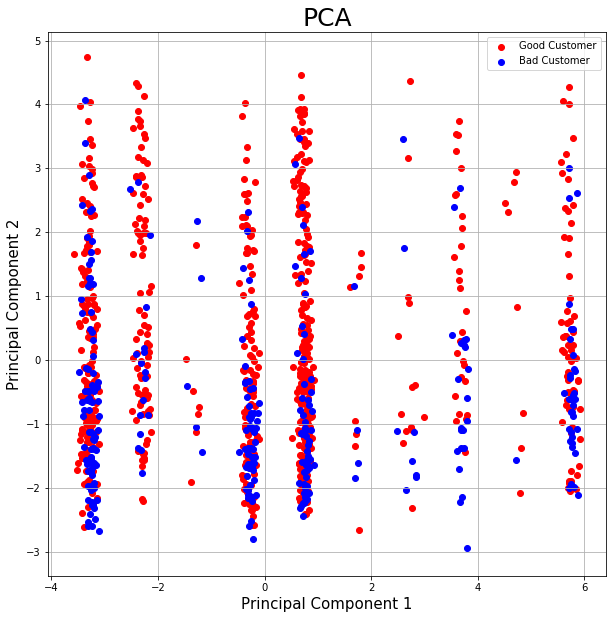

In [41]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 25)
targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_principal['Y'] == target
    ax.scatter(df_principal.loc[indicesToKeep, 'princ comp 1'], 
               df_principal.loc[indicesToKeep, 'princ comp 2'], c = color)
ax.legend(["Good Customer", "Bad Customer"])
ax.grid()

# SVM with PCA

In [42]:
custom_scorer = make_scorer(recall_score, greater_is_better=True,  pos_label=2, average = 'binary')
model = SVC(probability=True, random_state=0)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, verbose = 1)#, scoring=custom_scorer)
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.1s finished


GridSearchCV(estimator=SVC(probability=True, random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': ['auto', 'scale']},
             verbose=1)

In [43]:
grid_search.score(X_test_pca, y_test)

0.7181818181818181

In [44]:
pred_original = grid_search.predict(X_test_pca)
print("Simple")
report(y_test, pred_original)

Simple
[[149   6]
 [ 56   9]]
              precision    recall  f1-score   support

           1       0.73      0.96      0.83       155
           2       0.60      0.14      0.22        65

    accuracy                           0.72       220
   macro avg       0.66      0.55      0.53       220
weighted avg       0.69      0.72      0.65       220

Accuracy score:  0.7181818181818181


In [45]:
model_pca = grid_search.best_estimator_

initial decision function shape;  (10556,)
after reshape:  (91, 116)


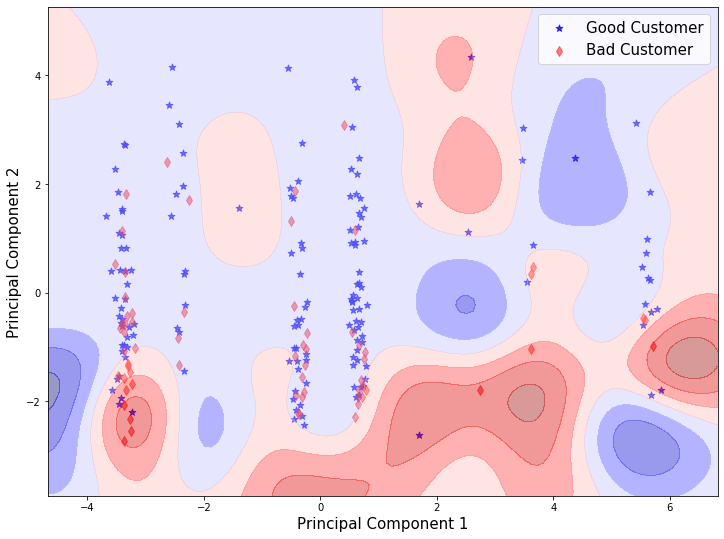

In [46]:
def plot_svm_pca(model):
    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        print ('initial decision function shape; ', np.shape(Z))
        Z = Z.reshape(xx.shape)
        print ('after reshape: ', np.shape(Z))
        out = ax.contourf(xx, yy, Z, **params)
        return out

    def make_meshgrid(x, y, h=.1):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    fig, ax = plt.subplots(figsize=(12,9))
    fig.patch.set_facecolor('white')
    colors={1:'b', 2:'r'}

    Y_tar_list = y_test.tolist()
    yl= [int(target1) for target1 in Y_tar_list]
    labels=yl

    labl={1:'Good Customer',2:'Bad Customer'}
    marker={1:'*',2:'d'}
    alpha={1:.8, 2:0.5}

    for l in np.unique(labels):
        ix = np.where(labels==l)
        ax.scatter(X0[ix],X1[ix], c=colors[l], label=labl[l], s=50,marker=marker[l], alpha=alpha[l])

    plot_contours(ax, model, xx, yy, cmap='seismic', alpha=0.4)
    plt.legend(fontsize=15)

    plt.xlabel("Principal Component 1",fontsize=15)
    plt.ylabel("Principal Component 2",fontsize=15)
    
plot_svm_pca(model_pca)

In [47]:
y_scores = model_pca.predict_proba(X_test_pca)[:, 0]
pred_adjusted = adjus_classes(y_scores, 0.8)
print("Adjusted")
report(y_test, pred_adjusted)

Adjusted
[[  1 154]
 [  0  65]]
              precision    recall  f1-score   support

           1       1.00      0.01      0.01       155
           2       0.30      1.00      0.46        65

    accuracy                           0.30       220
   macro avg       0.65      0.50      0.24       220
weighted avg       0.79      0.30      0.14       220

Accuracy score:  0.3


# Clustering
Whole dataset

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [50]:
clusters = pd.Series([1 if l == 0 else 2 for l in kmeans.labels_]) # because we have labels 1 and 2
report(y, clusters)

[[586 114]
 [235  65]]
              precision    recall  f1-score   support

           1       0.71      0.84      0.77       700
           2       0.36      0.22      0.27       300

    accuracy                           0.65      1000
   macro avg       0.54      0.53      0.52      1000
weighted avg       0.61      0.65      0.62      1000

Accuracy score:  0.651


In [51]:
clusters = pd.Series([2 if l == 0 else 1 for l in kmeans.labels_]) # because we have labels 1 and 2
report(y, clusters)

[[114 586]
 [ 65 235]]
              precision    recall  f1-score   support

           1       0.64      0.16      0.26       700
           2       0.29      0.78      0.42       300

    accuracy                           0.35      1000
   macro avg       0.46      0.47      0.34      1000
weighted avg       0.53      0.35      0.31      1000

Accuracy score:  0.349


We don't know which cluster the kmeans have choosen for the good/bad customers so we need to check both

The Elbow Method: finding a better cluster number

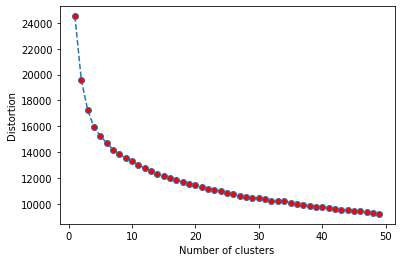

In [52]:
def elbow_calc(dist, data):
    distortions = []
    for i in range(1, dist):
        kmeans = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300,
        tol = 1e-04, random_state = 0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # plot
    plt.plot(range(1, dist), distortions, marker='o', linestyle='dashed', markerfacecolor='red')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
elbow_calc(50, X)

The distortion keeps decreasing

## KMeans with PCA

In [53]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_pca)

In [54]:
clusters = pd.Series([2 if l == 0 else 1 for l in kmeans.labels_]) # because we have labels 1 and 2
report(y, clusters)

[[115 585]
 [ 65 235]]
              precision    recall  f1-score   support

           1       0.64      0.16      0.26       700
           2       0.29      0.78      0.42       300

    accuracy                           0.35      1000
   macro avg       0.46      0.47      0.34      1000
weighted avg       0.53      0.35      0.31      1000

Accuracy score:  0.35


In [55]:
clusters = pd.Series([1 if l == 0 else 2 for l in kmeans.labels_]) # because we have labels 1 and 2
report(y, clusters)

[[585 115]
 [235  65]]
              precision    recall  f1-score   support

           1       0.71      0.84      0.77       700
           2       0.36      0.22      0.27       300

    accuracy                           0.65      1000
   macro avg       0.54      0.53      0.52      1000
weighted avg       0.61      0.65      0.62      1000

Accuracy score:  0.65


Visualize

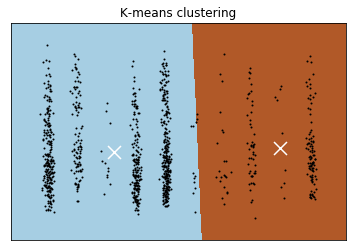

In [56]:
def plot_kmeans(kmeans):
    h = .01 

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(X_pca[:, 0], X_pca[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
plot_kmeans(kmeans)

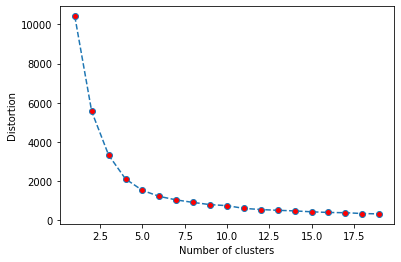

In [57]:
elbow_calc(20, X_pca)

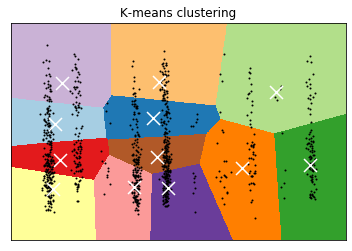

In [58]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(X_pca)
plot_kmeans(kmeans)

## Different clustering algos

DBSCAN

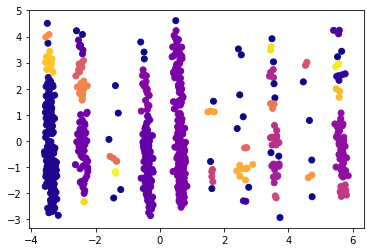

In [59]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.23, min_samples = 2)
y_dbscan = dbscan.fit_predict(X_train_pca)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_dbscan, cmap = "plasma")

AgglomerativeClustering

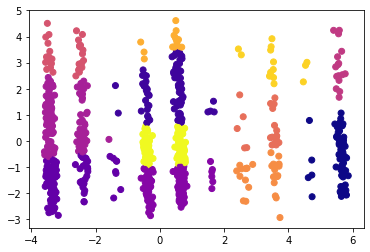

In [60]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 12, affinity = 'euclidean', linkage ='complete')
y_hc = hc.fit_predict(X_train_pca)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_hc, cmap = "plasma")

## using the dendrogram to find the optimal numbers of clusters.

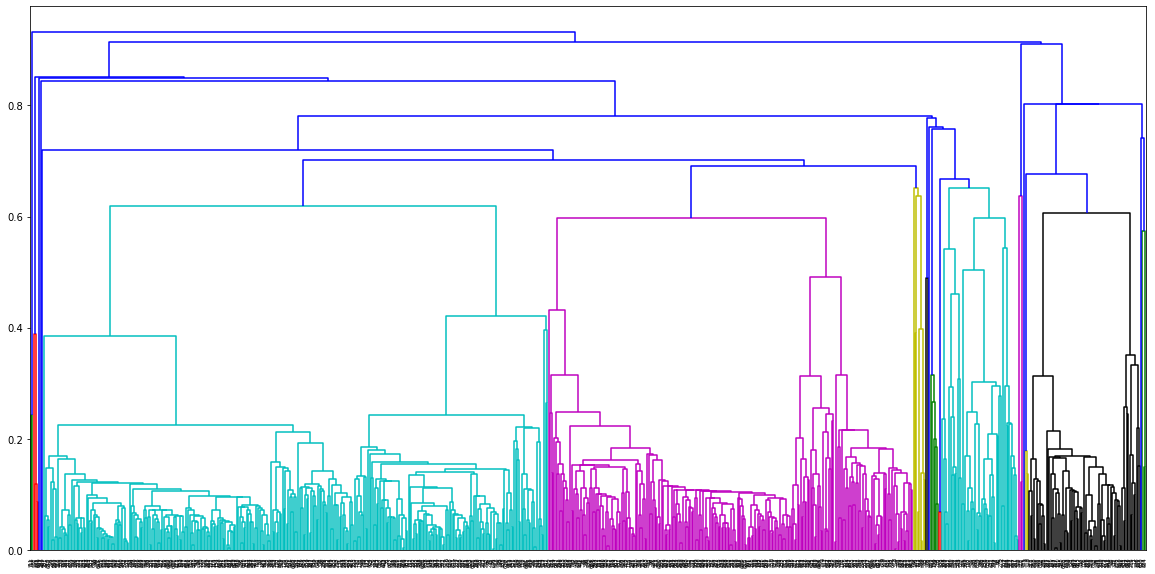

In [61]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method= "single"))

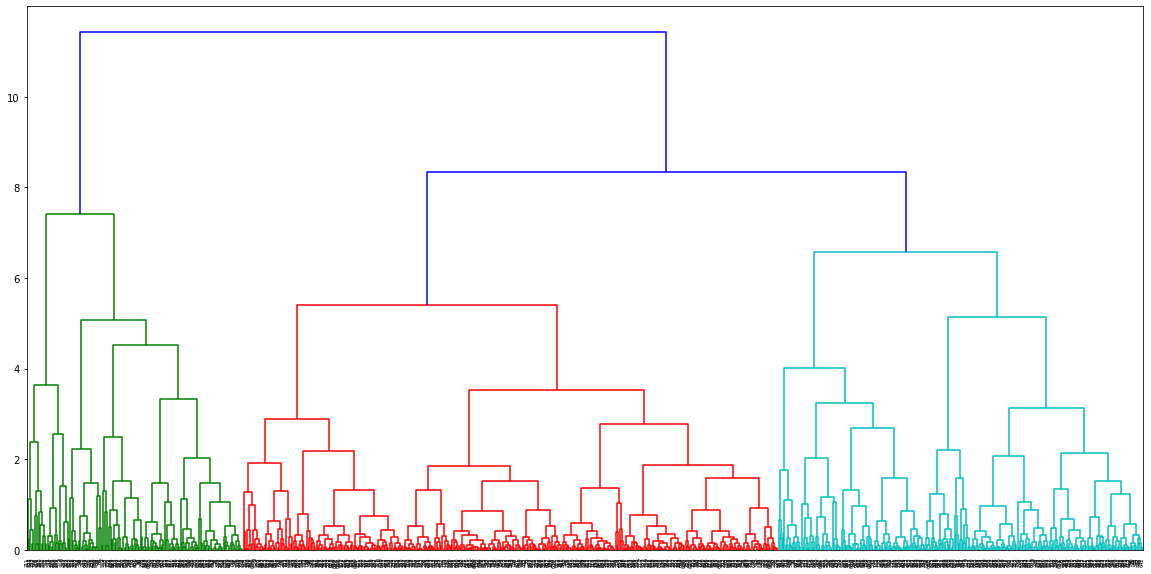

In [62]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method = "complete"))

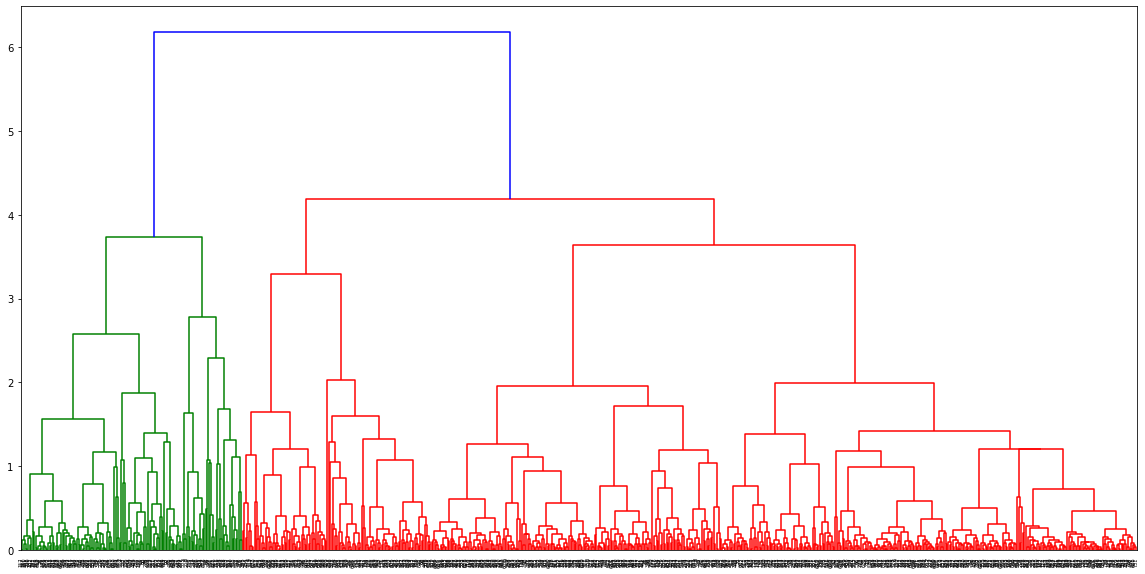

In [63]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method = "average"))

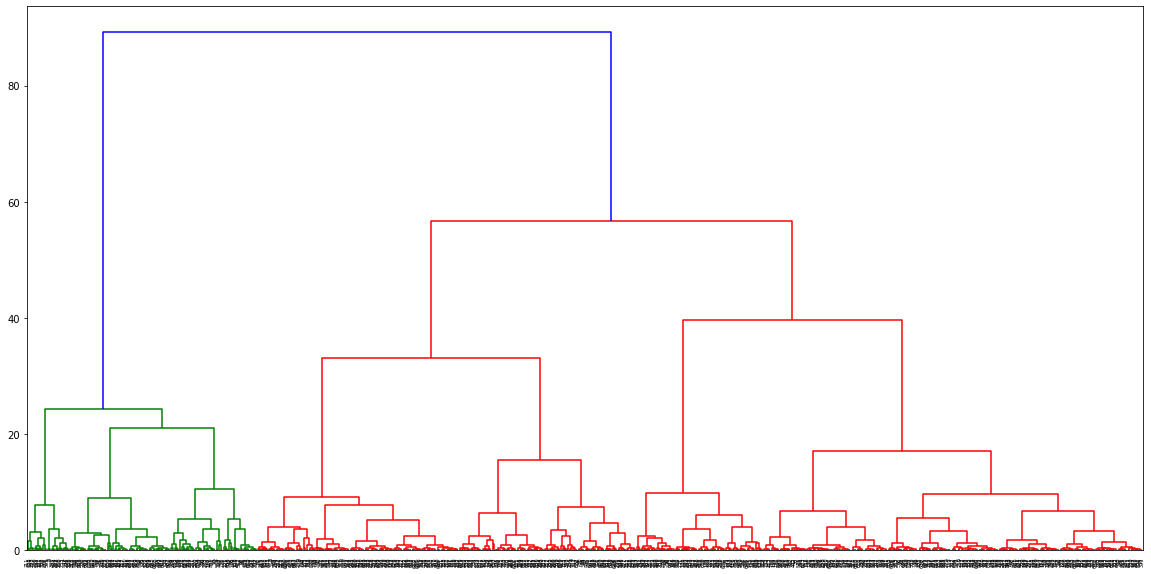

In [64]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method = "ward"))

## Search

In [65]:
kmeans = KMeans(n_clusters=cluster_num, n_init=10)
kmeans.fit(X)
distortions = []
for i in range(1, 50):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300,
    tol = 1e-04, random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

NameError: name 'cluster_num' is not defined